<a href="https://colab.research.google.com/github/RamaHM1/kecerdasanbuatan/blob/main/CNN%20Identifikasi%20Daun/CNN_Layer_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Library**



In [ ]:
import os
import zipfile
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report



### **Download Dataset**

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB" -O /tmp/herbal.zip && rm -rf /tmp/cookies.txt

--2021-12-14 23:02:31--  https://docs.google.com/uc?export=download&confirm=H55d&id=17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB
Resolving docs.google.com (docs.google.com)... 142.250.152.139, 142.250.152.100, 142.250.152.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.152.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-8k-docs.googleusercontent.com/docs/securesc/n1pcb5vb1smf7e3u8qu27vt6381snntk/v7fo525178d03u2jighhepg1qbasqqj8/1639522950000/15542249348961723767/09222774090971203296Z/17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB?e=download [following]
--2021-12-14 23:02:31--  https://doc-0s-8k-docs.googleusercontent.com/docs/securesc/n1pcb5vb1smf7e3u8qu27vt6381snntk/v7fo525178d03u2jighhepg1qbasqqj8/1639522950000/15542249348961723767/09222774090971203296Z/17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB?e=download
Resolving doc-0s-8k-docs.googleusercontent.com (doc-0s-8k-docs.googleusercontent.com)... 142.250.152.132, 2607:f8b0:4001:c56::84
Conne

### **Extrack Dataset**

In [ ]:
local_zip = '/tmp/herbal.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

### **Definisi Path Dataset**

In [ ]:
base_dir = '/tmp/herbal'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

### **Mengumpulkan Data Train**

In [ ]:
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

### **Mengumpulkan Data Validasi**

In [ ]:
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

### **Preprocessing Data**

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (70, 150, 150, 3)
Train Label =  (70,)
Validation Data =  (30, 150, 150, 3)
Validation Label =  (30,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [147 160 176]
Data setelah di-normalisasi  [0.5764706 0.627451  0.6901961]


In [ ]:
# Transformasi label encoder
print("Label sebelum di-encoder ", train_label[30:40])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print(label)
print("Label setelah di-encoder ", y_train[30:40])

Label sebelum di-encoder  ['daun_jambu' 'daun_jambu' 'daun_jambu' 'daun_jambu' 'daun_jambu'
 'daun_jeruk_nipis' 'daun_jeruk_nipis' 'daun_jeruk_nipis'
 'daun_jeruk_nipis' 'daun_jeruk_nipis']
daun_jeruk_nipis
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]


### **Definisi Model**

In [ ]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 38, 38, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 19, 19, 64)     

In [ ]:
# Compile model

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<h3>Training Model</h3>

In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
4/4 [==============================] - 3s 507ms/step - loss: 1.0480 - acc: 0.5000 - val_loss: 0.7071 - val_acc: 0.5000
Epoch 2/50
4/4 [==============================] - 2s 448ms/step - loss: 0.6980 - acc: 0.5571 - val_loss: 0.6800 - val_acc: 0.7333
Epoch 3/50
4/4 [==============================] - 2s 455ms/step - loss: 0.6663 - acc: 0.9000 - val_loss: 0.6690 - val_acc: 0.7667
Epoch 4/50
4/4 [==============================] - 2s 451ms/step - loss: 0.6441 - acc: 0.8857 - val_loss: 0.6403 - val_acc: 0.8000
Epoch 5/50
4/4 [==============================] - 2s 448ms/step - loss: 0.6000 - acc: 0.7714 - val_loss: 0.5983 - val_acc: 0.7000
Epoch 6/50
4/4 [==============================] - 2s 450ms/step - loss: 0.5303 - acc: 0.7286 - val_loss: 0.5336 - val_acc: 0.7667
Epoch 7/50
4/4 [==============================] - 2s 483ms/step - loss: 0.4402 - acc: 0.9143 - val_loss: 0.5139 - val_acc: 0.7000
Epoch 8/50
4/4 [==============================] - 2s 450ms/step - loss: 0.3305 - acc: 0.87

### **Evaluasi Model**

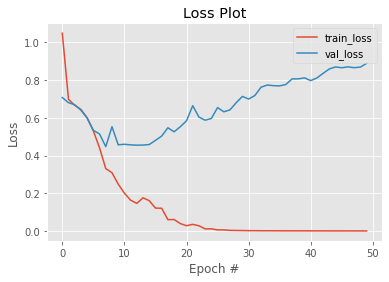

In [ ]:
%matplotlib inline

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

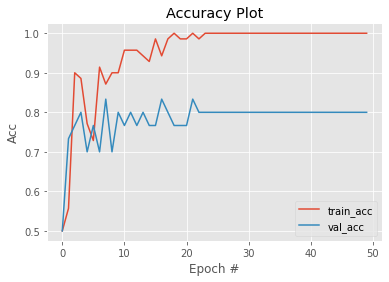

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.76      0.87      0.81        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30



### **Tes Prediksi**

In [ ]:
queryPath = '/tmp/herbal/train/daun_jambu/jambu.1.jpg'
query = cv2.imread(queryPath)
img_arr = cv2.resize(query, (150,150))
img_arr = img_arr / 255.0
img_arr = img_arr.reshape(1, 150,150,3)

prediction = model.predict(img_arr)


if prediction < 0.5 :
    target = "Jambu Biji"
else :
    target = "Jeruk Nipis"
text = "{}".format(target)

print(prediction)
print('Daun '+text)

[[9.54496e-05]]
Daun Jambu Biji


In [ ]:
queryPath = '/tmp/herbal/train/daun_jeruk_nipis/jeruknipis.1.jpg'
query = cv2.imread(queryPath)
img_arr = cv2.resize(query, (150,150))
img_arr = img_arr / 255.0
img_arr = img_arr.reshape(1, 150,150,3)

prediction = model.predict(img_arr)


if prediction < 0.5 :
    target = "Jambu Biji"
else :
    target = "Jeruk Nipis"
text = "{}".format(target)

print(prediction)
print('Daun '+text)

[[0.99909925]]
Daun Jeruk Nipis


### **Save Model Data Ke H5**

In [ ]:

model.save('/tmp/model.h5')
print('Model Saved!')

savedModel=load_model('/tmp/model.h5')
savedModel.summary()

Model Saved!
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 38, 38, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 19,